# Next overpass predictor

## Background
* Knowing the time of a satellite overpass (OP) at a precise location is crucial to plan and prepare disaster impact studies. 
The script below can be used to predict the overpasses of the Landsat 8 & 9 and Sentinel 1 & 2 satellites over a  selected location. For Landsat 8 this occurs every 16 days and for Sentinel 2A / 2B this occurs every 10 days.

* The code calls the Python package 'next_pass' located at https://github.com/ehavazli/next_pass. The latter predicts the next overpass of the satellite of interest by scanning the relevant acquisition plans:
	- Landsat acquisition plans (json files) : https://landsat.usgs.gov/sites/default/files/landsat_acq/assets/json/cycles_full.json
	- Sentinel acquisition plans (KML files to import to Google Earth Pro) : https://sentinel.esa.int/web/sentinel/copernicus/sentinel-1/acquisition-plans  

## Description

All what a user needs to provide is the precise location for which he desires to identify the next overpasses. The location can be inputted as (latitude, longitude) or as the name of the city of interest. The script returns the next collect for Sentinel-1 and Sentinel-2 and the next passes, in ascending and descending directions separately, for Landsat-8 and Landsat-9:

- Specify a location 
- Run find_next_overpass for Sentinel-1, Sentinel-2 and the Landsats (8&9) 
- Visualize each of the above predicted overpass 

The outputs of next_pass can be compared against overpasses of the site you are interested in using the ESA Orbital Prediction and Overpass Tool (OPOT) at https://evdc.esa.int/orbit/ 


## Getting started
To run the overpass predictor with the given location, run all cells in the notebook starting with the "Load packages" cell.

### Load packages

In [1]:
import next_pass
from geopy.geocoders import Nominatim

### Specify location
Start with selecting the location by  precising the latitude/longitude. The below tool helps to determine the coordinates of major cities.

In [2]:
# Select a city 
city_name = "La Crescenta, CA"

# Create a geolocator object
geolocator = Nominatim(user_agent="your_app_name") 

# Get the location information for a city
location = geolocator.geocode(city_name)

# Print the latitude and longitude
print("** ",city_name, " coordinates = " );
print("Latitude:", location.latitude)
print("Longitude:", location.longitude)

**  La Crescenta, CA  coordinates = 
Latitude: 34.230429
Longitude: -118.2350733


In [3]:
# Locations (here La Crescenta)
lat = 34.230429
lon = -118.2350733

### Specify satellites of interest 
For now, the tool operates for Sentinel 1A and 2A and Landsat 8 and 9.

In [4]:
# Satellites
sat1 = "sentinel-1"
sat2 = "sentinel-2"
sat3 = "landsat"

### Run next_pass
use next_pass to predict the overpasses of the above satellites over the selected location

In [6]:
print("*** ",sat1," ***")
print(next_pass.find_next_overpass(lat, lon, sat1))

***  sentinel-1  ***
+-----+--------------------------+------------------+
|   # | Collection Date & Time   |   Relative Orbit |
+=====+==========================+==================+
|   1 | 2025-02-14 01:50:13      |               64 |
+-----+--------------------------+------------------+
|   2 | 2025-02-14 13:49:51      |               71 |
+-----+--------------------------+------------------+
|   3 | 2025-02-19 01:58:22      |              137 |
+-----+--------------------------+------------------+


In [7]:
print("*** ",sat2," ***")
print(next_pass.find_next_overpass(lat, lon, sat2))

***  sentinel-2  ***
+-----+--------------------------+------------------+
|   # | Collection Date & Time   |   Relative Orbit |
+=====+==========================+==================+
|   1 | 2025-02-16 18:33:30      |               27 |
+-----+--------------------------+------------------+


In [9]:
print("*** ",sat3," ***")
print(next_pass.find_next_overpass(lat, lon, sat3))

***  landsat  ***
Ascending Direction:
  Paths: [139]
  Rows: [208]
  Next passes:
    Landsat_8: 2/22/2025
    Landsat_9: 2/14/2025
Descending Direction:
  Paths: [41]
  Rows: [36]
  Next passes:
    Landsat_8: 2/23/2025
    Landsat_9: 2/15/2025


{'type': 'FeatureCollection', 'features': []}

### Overpasses Vizualisation (in progress ...)  
The below vizualization tool shows the path of a selected satellite at the predicted date/time

2025-01-29 14:16:19.013792


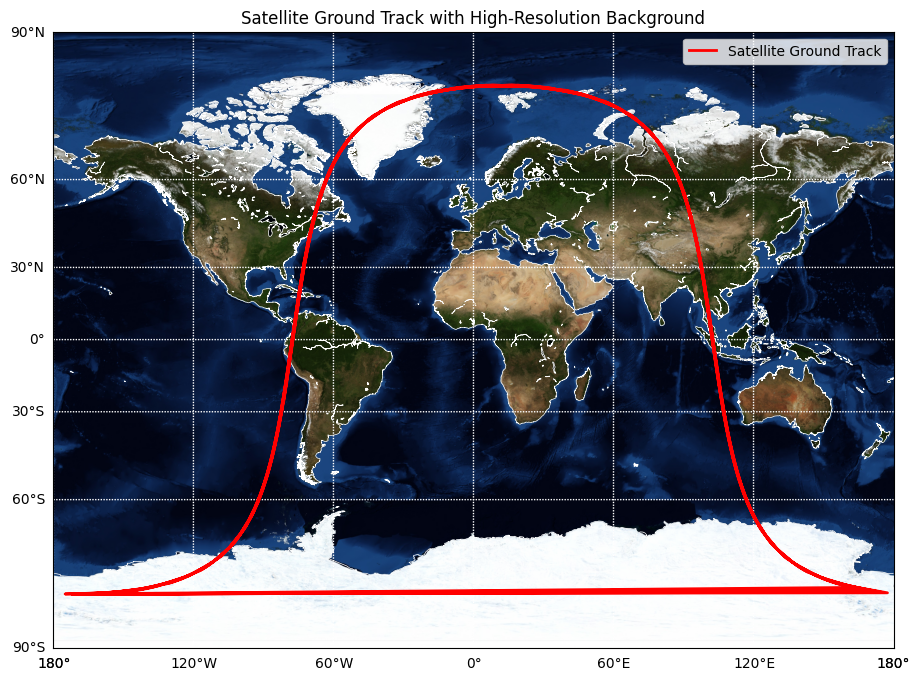

In [28]:
# Satellite TLE 1/23/2025
# Landsat 8
L8_line1 = "1 39084U 13008A   25023.56604824  .00001102  00000-0  25450-3 0  9996"
L8_line2 = "2 39084  98.2046  96.2244 0001173  97.4673 262.6659 14.57134767623686"
# Landsat 9
L9_line1 = "1 49260U 21088A   25023.18851768  .00001080  00000-0  24960-3 0  9999"
L9_line2 = "2 49260  98.2077  95.8900 0001166  86.0042 274.1289 14.57119979176731"
# Sentinel 1


# Initialize satellite object
satellite = Satrec.twoline2rv(L9_line1, L9_line2)

# Time range for prediction
start_time = datetime.now() + timedelta(days=6)
print(start_time)
end_time = start_time + timedelta(hours=12)
time_step = timedelta(minutes=1)

# Prepare ground track
lats, lons = [], []
current_time = start_time
while current_time <= end_time:
    jd, fr = jday(current_time.year, current_time.month, current_time.day,
                  current_time.hour, current_time.minute, current_time.second)
    e, r, v = satellite.sgp4(jd, fr)
    if e == 0:  # Propagate without error
        x, y, z = r
        r_norm = np.linalg.norm(r)

        # here two ways to calculate lat and lon either from np or using 
        lat = np.degrees(np.arcsin(z / r_norm))
        lon = np.degrees(np.arctan2(y, x))
        #lat, lon, alt = ecef_to_llh(x, y, z)
        lats.append(lat)
        lons.append(lon)
    current_time += time_step

lons = [lon if lon <= 180 else lon - 360 for lon in lons]

# Plot with high-resolution background
fig, ax = plt.subplots(figsize=(12, 8))
m = Basemap(projection='mill', resolution='l', lat_0=0, lon_0=0)

# Add high-resolution Earth background
m.bluemarble()  # Use m.shadedrelief() or m.etopo() for other styles

# Draw coastlines and grid lines for reference
m.drawcoastlines(color="white", linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 30), labels=[1, 0, 0, 0], color="white")
m.drawmeridians(np.arange(-180, 181, 60), labels=[0, 0, 0, 1], color="white")

# Convert satellite lat/lon to map coordinates
x, y = m(lons, lats)
m.plot(x, y, linestyle='-', linewidth=2, color='red', label='Satellite Ground Track')

plt.title("Satellite Ground Track with High-Resolution Background")
plt.legend()
plt.show()

In [19]:
import folium
from IPython.display import display, clear_output
import time

# Define the initial map location
map_center = [37.7749, -122.4194]  # San Francisco coordinates
mymap = folium.Map(location=map_center, zoom_start=13)

# Initial coordinates of the moving point
locations = [
    [37.7749, -122.4194],  # Starting point
    [37.7760, -122.4180],
    [37.7770, -122.4170],
    [37.7780, -122.4160],  # Moving point
    [37.7790, -122.4150],
]

# Function to update the map
def update_map(location):
    global mymap  # Use the global map object
    # Clear previous output
    clear_output(wait=True)
    # Add marker to the map
    folium.Marker(location).add_to(mymap)
    # Display the map
    display(mymap)

# Loop through the locations and update the map
for loc in locations:
    update_map(loc)
    time.sleep(1)  # Pause for 1 second
